<a href="https://colab.research.google.com/github/ds-rachid/datacamp-projects/blob/main/Hypertension_Measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [ ]:
hypertension = pd.read_csv('/content/Hypertension_Measures.csv', parse_dates=['Date'])
hypertension.head()

,Date,Time perids,Hour,Systolic (mmHg),Diastolic (mmHg),Observations
0,2024-05-05,morning,6:16 AM,105,60,OK
1,2024-05-05,morning,6:21 AM,122,67,Normale
2,2024-05-05,evening,10:15 PM,118,66,OK
3,2024-05-05,evening,10:21 PM,137,71,Normale Haute
4,2024-05-06,morning,5:30 AM,148,74,Léger hypertonie


In [ ]:
hypertension.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              100 non-null    datetime64[ns]
 1   Time perids       100 non-null    object        
 2   Hour              100 non-null    object        
 3   Systolic (mmHg)   100 non-null    int64         
 4   Diastolic (mmHg)  100 non-null    int64         
 5   Observations      100 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.8+ KB


In [ ]:
hypertension

,Date,Time perids,Hour,Systolic (mmHg),Diastolic (mmHg),Observations
0,2024-05-05,morning,6:16 AM,105,60,OK
1,2024-05-05,morning,6:21 AM,122,67,Normale
2,2024-05-05,evening,10:15 PM,118,66,OK
3,2024-05-05,evening,10:21 PM,137,71,Normale Haute
4,2024-05-06,morning,5:30 AM,148,74,Léger hypertonie
...,...,...,...,...,...,...
95,2024-05-29,evening,10:35 PM,145,70,Léger hypertonie
96,2024-05-30,morning,5:25 AM,126,67,Normale
97,2024-05-30,morning,5:32 AM,132,67,Normale Haute
98,2024-05-30,evening,10:34 PM,120,71,OK


In [ ]:
hypertension[['Systolic (mmHg)', 'Diastolic (mmHg)']].describe().round()

,Systolic (mmHg),Diastolic (mmHg)
count,100.0,100.0
mean,131.0,69.0
std,10.0,5.0
min,104.0,56.0
25%,124.0,66.0
50%,132.0,70.0
75%,139.0,72.0
max,149.0,80.0


In [ ]:
hypertension['Observations'].value_counts(normalize=True)

Observations
Normale Haute       0.40
Normale             0.22
Léger hypertonie    0.21
OK                  0.17
Name: proportion, dtype: float64

In [ ]:
hypertension_grouped = hypertension.groupby(['Date', 'Time perids']).agg({'Systolic (mmHg)': 'mean', 'Diastolic (mmHg)':'mean'})
hypertension_grouped

Systolic (mmHg)  Diastolic (mmHg)
Date       Time perids                                   
2024-05-05 evening                127.5              68.5
           morning                113.5              63.5
2024-05-06 evening                120.0              67.5
           morning                139.5              71.0
2024-05-07 evening                125.5              64.0
           morning                132.5              70.0
2024-05-08 evening                114.0              61.5
           morning                136.5              72.5
2024-05-09 evening                143.5              75.5
           morning                133.0              73.5
2024-05-10 evening                129.5              74.5
           morning                113.5              64.5
2024-05-11 evening                127.5              68.5
           morning                132.0              66.0
2024-05-12 evening                118.0              69.0
           morning                145.5              74.5
2024-05-13 evening                114.5              64.5
           morning                141.5              73.5
2024-05-14 evening                124.5              69.0
           morning                131.0              68.5
2024-05-15 evening                120.5              64.5
           morning                136.0              63.5
2024-05-16 evening                112.0              59.5
           morning                137.5              68.5
2024-05-17 evening                133.0              74.5
           morning                133.5              69.5
2024-05-18 evening                143.5              73.0
           morning                134.5              68.0
2024-05-19 evening                127.5              64.0
           morning                133.5              69.0
2024-05-20 evening                129.0              62.5
           morning                135.0              71.5
2024-05-21 evening                133.0              70.5
           morning                128.0              67.5
2024-05-22 evening                136.0              73.0
           morning                129.0              66.0
2024-05-23 evening                136.0              69.5
           morning                141.5              72.0
2024-05-24 evening                146.5              77.0
           morning                140.5              65.5
2024-05-26 evening                115.0              71.0
           morning                141.0              70.0
2024-05-27 evening                136.5              67.0
           morning                145.0              70.0
2024-05-28 evening                120.0              68.0
           morning                138.5              72.5
2024-05-29 evening                145.5              70.0
           morning                136.0              58.0
2024-05-30 evening                126.0              68.0
           morning                129.0              67.0

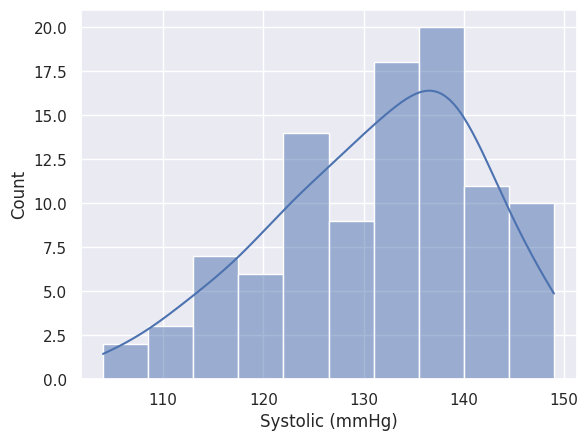

In [ ]:
sns.histplot(data=hypertension, x="Systolic (mmHg)", bins=10, kde=True)
plt.show()

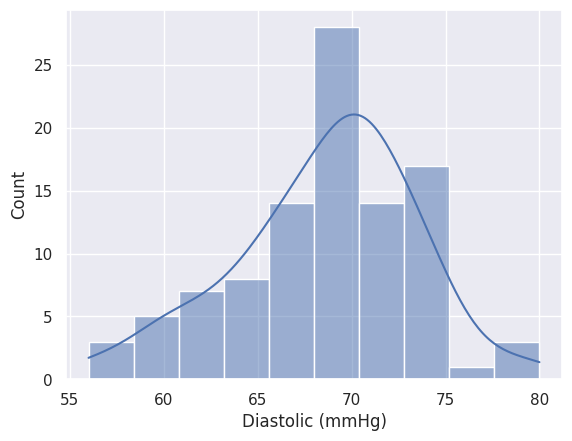

In [ ]:
sns.histplot(data=hypertension, x="Diastolic (mmHg)", bins=10, kde=True)
plt.show()

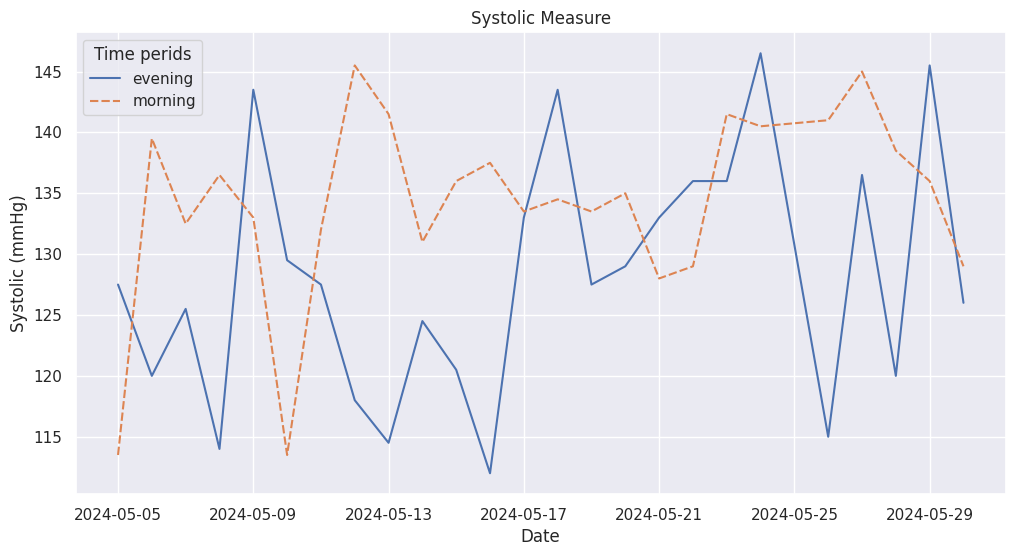

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
my_plot = sns.lineplot(data=hypertension_grouped, x="Date", y="Systolic (mmHg)", hue='Time perids',style='Time perids',errorbar=None)
plt.title('Systolic Measure')
plt.show()

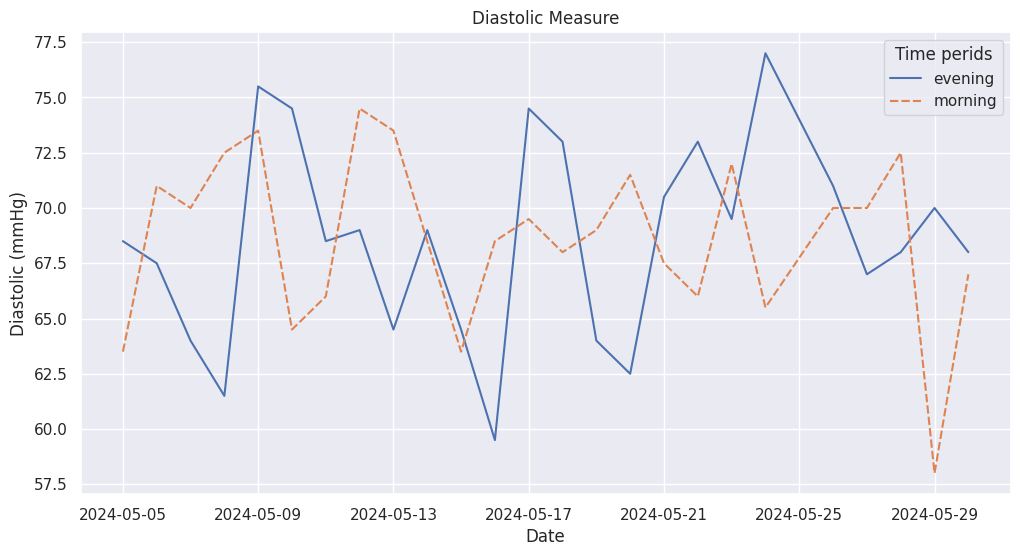

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(data=hypertension_grouped, x="Date", y="Diastolic (mmHg)", hue='Time perids', style='Time perids', errorbar=None)
plt.title('Diastolic Measure')
plt.show()

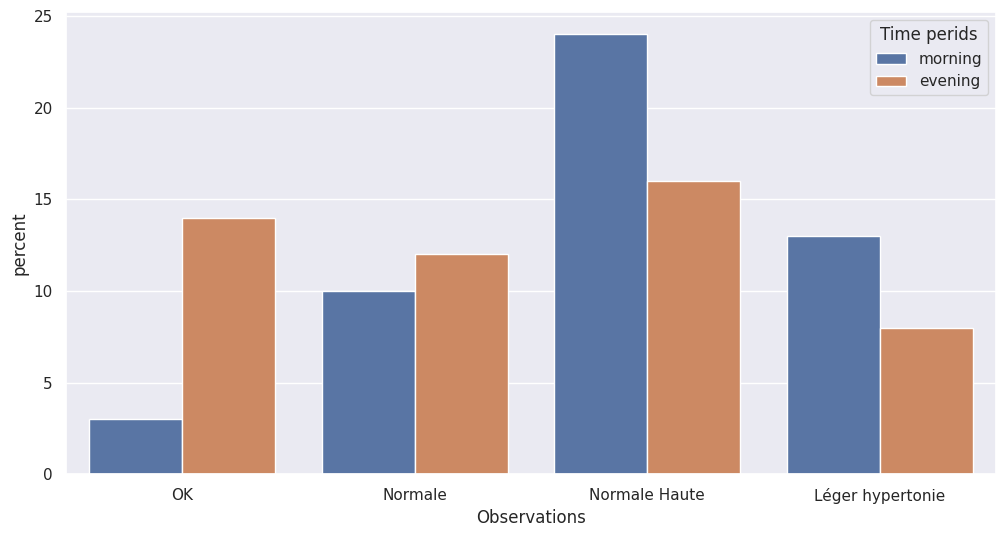

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(hypertension, x='Observations', hue="Time perids", stat='percent')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')